In [1]:
import h5py
import matplotlib.pyplot as plt
import os

from mpl_toolkits.axes_grid1 import make_axes_locatable
from plot_utils import *

%matplotlib inline

In [2]:
# initialize data arrays
sigmaPs = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
sigmaCs = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
mus = np.array(['-1.0', '-0.75', '-0.5', '-0.25', '0.0', '0.25', '0.5', '0.75', '1.0'])
combined_P = np.zeros((sigmaPs.size, mus.size))
combined_C = np.zeros((sigmaCs.size, mus.size))

In [3]:
for sigmaP_idx, sigmaP in enumerate(sigmaPs):
    for mu_idx, mu in enumerate(mus):
        f = os.path.join('mi_results', 'exp5', 'mi_N12_sigmaM%0.1f_sigmaC0.5_sigmaS1.0_mu' %(sigmaP)+ mu + '.h5')
        results = h5py.File(f, 'r')['results'][:]
        combined_P[sigmaP_idx, mu_idx] = np.mean(results)

for sigmaC_idx, sigmaC in enumerate(sigmaCs):
    for mu_idx, mu in enumerate(mus):
        f = os.path.join('mi_results', 'exp6', 'mi_N12_sigmaM0.5_sigmaC%0.1f_sigmaS1.0_mu' %(sigmaC)+ mu + '.h5')
        results = h5py.File(f, 'r')['results'][:]
        combined_C[sigmaC_idx, mu_idx] = np.mean(results)

In [4]:
combined_P /= np.max(combined_P, axis=1, keepdims=True)
combined_C /= np.max(combined_C, axis=1, keepdims=True)

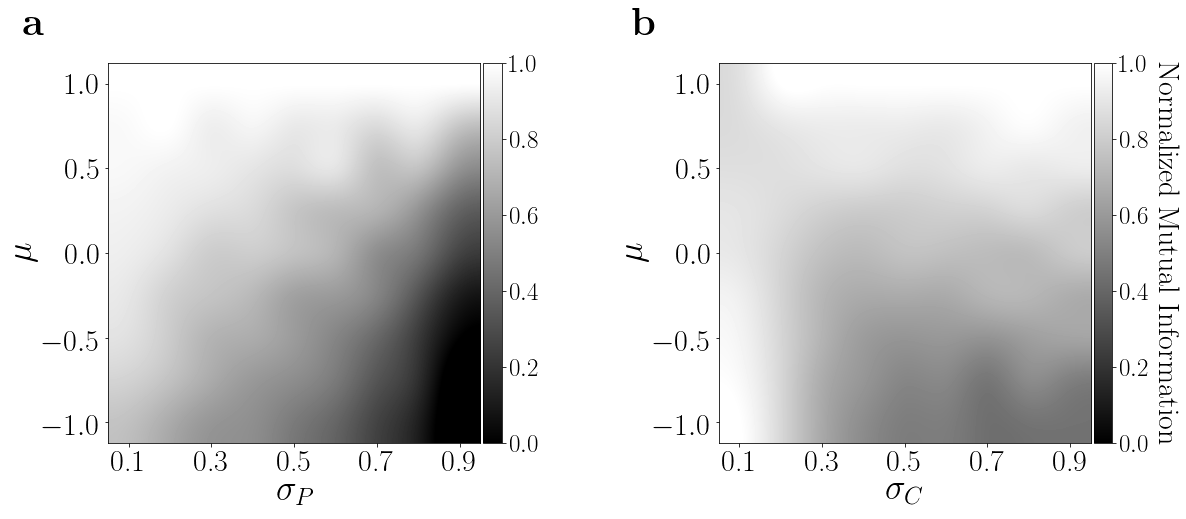

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Figure 8a
img = axes[0].imshow(
    combined_P.T,
    interpolation='spline36',
    vmin=0, vmax=1)

# axes labels
axes[0].set_xlabel(r'$\sigma_P$', fontsize=35)
axes[0].set_ylabel(r'$\mu$', fontsize=35)
axes[0].tick_params(labelsize=30)

# tick labels
ticks = [0, 2, 4, 6, 8]
xticklabels = [sigmaPs[tick] for tick in ticks]
yticklabels = [r'$' + mus[tick] + '$' for tick in ticks]
axes[0].set_xticks(ticks)
axes[0].set_xticklabels(xticklabels)
axes[0].set_yticks(ticks)
axes[0].set_yticklabels(yticklabels)

# handle colorbar
axes[0].set_aspect('auto')
divider = make_axes_locatable(axes[0])
cax = divider.append_axes("right", size="5%", pad=0.04)
cb = plt.colorbar(img, fraction=0.046, pad=0.04, cax=cax)
cb.ax.set_ylabel(r'Normalized Mutual Information', fontsize=30, rotation=270, labelpad=30)
cb.ax.tick_params(labelsize=25) 


# Figure 8b
img2 = axes[1].imshow(
    combined_C.T,
    interpolation='spline36',
    vmin=0, vmax=1)

# axes labels
axes[1].set_xlabel(r'$\sigma_C$', fontsize=35)
axes[1].set_ylabel(r'$\mu$', fontsize=35)
axes[1].tick_params(labelsize=30)

# tick labels
axes[1].set_xticks(ticks)
axes[1].set_xticklabels(xticklabels)
axes[1].set_yticks(ticks)
axes[1].set_yticklabels(yticklabels)

# handle colorbar
axes[1].set_aspect('auto')
divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="5%", pad=0.04)
cb = plt.colorbar(img, fraction=0.046, pad=0.04, cax=cax)
cb.ax.set_ylabel(r'Normalized Mutual Information', fontsize=30, rotation=270, labelpad=30)
cb.ax.tick_params(labelsize=25) 

# subplot labels
axes[0].text(
    x=-0.2, y=1.1, s=r'\textbf{a}',
    fontsize=40,
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[0].transAxes)

axes[1].text(
    x=-0.2, y=1.1, s=r'\textbf{b}',
    fontsize=40,
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[1].transAxes)

plt.subplots_adjust(wspace=0.55)

plt.savefig('figure8.pdf', bbox_inches='tight')